# UTSA CS 3793: Assignment-4

**Badran - Omar - puf311**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natural Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [ ]:
# importing all required libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from google.colab import drive
from scipy import ndimage
import cv2
import random
import pandas as pd
drive.mount('/content/drive')



Mounted at /content/drive


# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following: 

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [ ]:
# Load the data - training as well as testing
basePath = "/content/drive/My Drive/Colab Notebooks/cifar/cifar-100-python"
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='fine')


# Prepare the data that can be used by the next step - creating and training the DL model
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(x_test.shape)


# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']



169001437/169001437 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


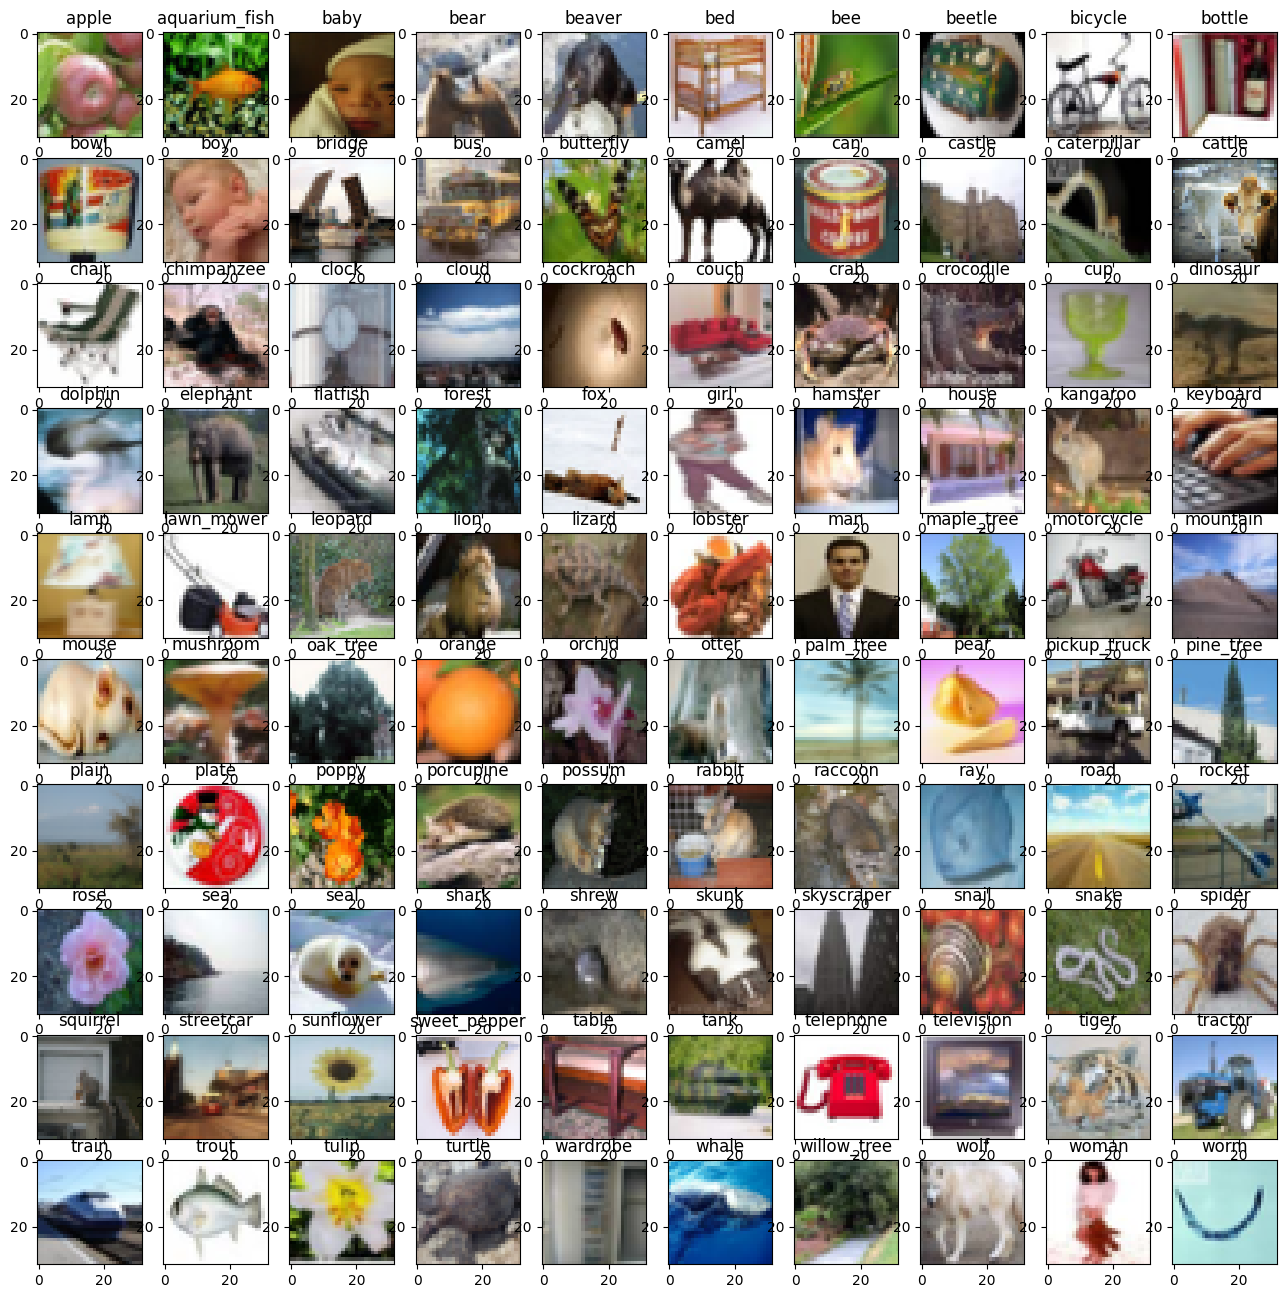

In [ ]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total


plt.figure(figsize=(16,16))
for i in range(0,100):
    indices = np.where(y_train == i)[0]
    indices_list = list(indices)
    plt.subplot(10,10,i+1), plt.imshow(x_train[random.choice(indices_list)]), plt.title(fine_labels[i])
plt.show()



## CNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [ ]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
def create_model():
  model = keras.Sequential([
                                keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])),
                                keras.layers.MaxPooling2D(pool_size=(2,2)),
                                keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                                keras.layers.MaxPooling2D(pool_size=(2,2)),
                                keras.layers.Flatten(),
                                keras.layers.Dense(500, activation='relu'),
                                keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
                                ])

  model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model

mymodel = create_model()

In [ ]:
# Print the DL model summary
print(mymodel.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_10 (Dense)            (None, 500)              

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
cp_callback = keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/cifar/",
                                                 save_weights_only=True,
                                                 verbose=1)


In [ ]:
# Train/fit the DL model using the training CIFAR-100 data
mymodel.fit(x_train, y_train, epochs=50, batch_size=50, validation_data=(x_test, y_test), callbacks=[cp_callback])

Epoch 1/50
1000/1000 [==============================] - ETA: 0s - loss: 4.5178 - accuracy: 0.0268
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
1000/1000 [==============================] - 255s 255ms/step - loss: 4.5178 - accuracy: 0.0268 - val_loss: 4.2687 - val_accuracy: 0.0561
Epoch 2/50
1000/1000 [==============================] - ETA: 0s - loss: 4.0980 - accuracy: 0.0773
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
1000/1000 [==============================] - 250s 250ms/step - loss: 4.0980 - accuracy: 0.0773 - val_loss: 3.9737 - val_accuracy: 0.0969
Epoch 3/50
1000/1000 [==============================] - ETA: 0s - loss: 3.8598 - accuracy: 0.1172
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
1000/1000 [==============================] - 247s 247ms/step - loss: 3.8598 - accuracy: 0.1172 - val_loss: 3.7909 - val_accuracy: 0.1318
Epoch 4/50
1000/1000 [==============================] - ETA: 0s - loss: 3.6982 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


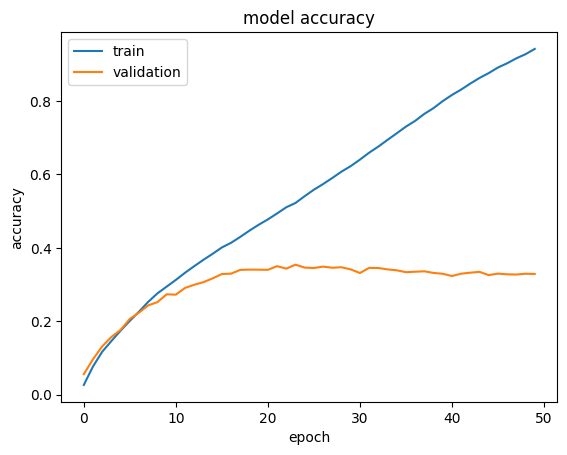

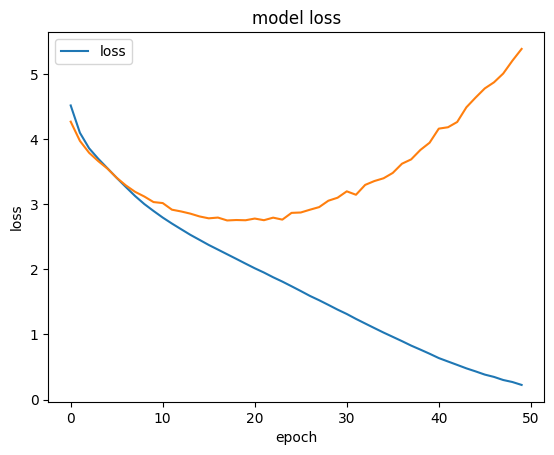

In [ ]:
# Plot the training/validation accuracy and loss
#plt.plot(mymodel.history.history['accuracy'])
print(mymodel.history.history.keys())


plt.plot(mymodel.history.history['accuracy'])
plt.plot(mymodel.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
#plt.plot(mymodel.history.history['loss'])
plt.plot(mymodel.history.history['loss'])
plt.plot(mymodel.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()


## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model. 

In [ ]:
# Re-initialize the model
mymodel = create_model()


In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
mymodel.load_weights('/content/drive/My Drive/Colab Notebooks/cifar/')

In [ ]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
mymodel.evaluate(x_test,y_test,batch_size=1)


10000/10000 [==============================] - 43s 4ms/step - loss: 5.3863 - accuracy: 0.3289


[5.386340141296387, 0.328900009393692]

# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(15 points)

In this section, you will write code for the following: 

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [ ]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word
(x_train2, y_train2), (x_test2, y_test2) = keras.datasets.reuters.load_data(num_words=10000)
words = keras.datasets.reuters.get_word_index()
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)
print(len(np.unique(y_train2)))
print(words)



(8982,)
(8982,)
(2246,)
(2246,)
46
{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 16266, 'slickline': 20692, 'd

In [ ]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words
x_train2 = keras.preprocessing.sequence.pad_sequences(x_train2, value=0, padding='post', maxlen=200)
x_test2 = keras.preprocessing.sequence.pad_sequences(x_test2, value=0, padding='post', maxlen=200)

print(x_train2.shape)
print(x_test2.shape)

y_train2 = keras.utils.to_categorical(y_train2, 46)
y_test2 = keras.utils.to_categorical(y_test2, 46)


print(y_train2.shape)
print(y_test2.shape)

(8982, 200)
(2246, 200)
(8982, 46)
(2246, 46)


## RNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
def create_model2():
    model = keras.Sequential([
                                keras.layers.Embedding(10000, 64),
                                keras.layers.SimpleRNN(64, return_sequences = True),
                                keras.layers.LSTM(64, return_sequences = True),
                                keras.layers.SimpleRNN(64, return_sequences = True),
                                keras.layers.SimpleRNN(64),
                                keras.layers.Dense(64, activation='relu'),
                                keras.layers.Dense(56, activation='relu'),
                                keras.layers.Dense(46, activation='softmax')
                                ])
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
        )
    return model

model2 = create_model2()


In [ ]:
# Print the DL model summary
print(model2.summary())


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, None, 64)          640000    
                                                                 
 simple_rnn_43 (SimpleRNN)   (None, None, 64)          8256      
                                                                 
 lstm_6 (LSTM)               (None, None, 64)          33024     
                                                                 
 simple_rnn_44 (SimpleRNN)   (None, None, 64)          8256      
                                                                 
 simple_rnn_45 (SimpleRNN)   (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 64)                4160      
                                                                 
 dense_36 (Dense)            (None, 56)              

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
cp_callback = keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/reuters/",
                                                 save_weights_only=True,
                                                 verbose=1)


In [ ]:
# Train/fit the DL model using the training Reuters data
model2.fit(x_train2, y_train2, epochs=20, batch_size=64, validation_data=(x_test2, y_test2), callbacks=[cp_callback])

Epoch 1/20
141/141 [==============================] - ETA: 0s - loss: 2.4317 - accuracy: 0.3955
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/reuters/
141/141 [==============================] - 74s 485ms/step - loss: 2.4317 - accuracy: 0.3955 - val_loss: 2.1200 - val_accuracy: 0.4644
Epoch 2/20
141/141 [==============================] - ETA: 0s - loss: 2.0886 - accuracy: 0.4640
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/reuters/
141/141 [==============================] - 71s 507ms/step - loss: 2.0886 - accuracy: 0.4640 - val_loss: 1.9975 - val_accuracy: 0.4822
Epoch 3/20
141/141 [==============================] - ETA: 0s - loss: 1.9573 - accuracy: 0.4892
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/reuters/
141/141 [==============================] - 67s 473ms/step - loss: 1.9573 - accuracy: 0.4892 - val_loss: 2.0814 - val_accuracy: 0.4822
Epoch 4/20
141/141 [==============================] - ETA: 0s - loss: 2.0276 - accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


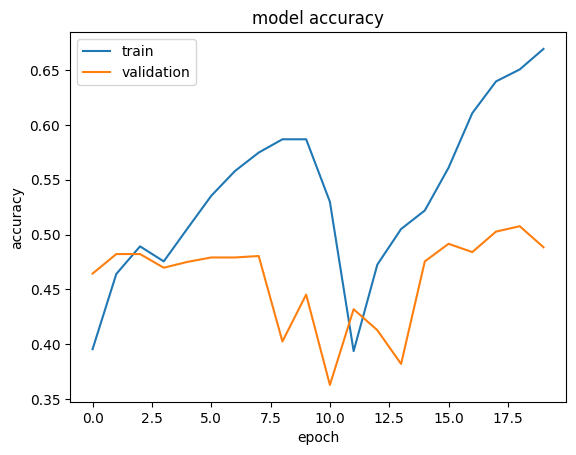

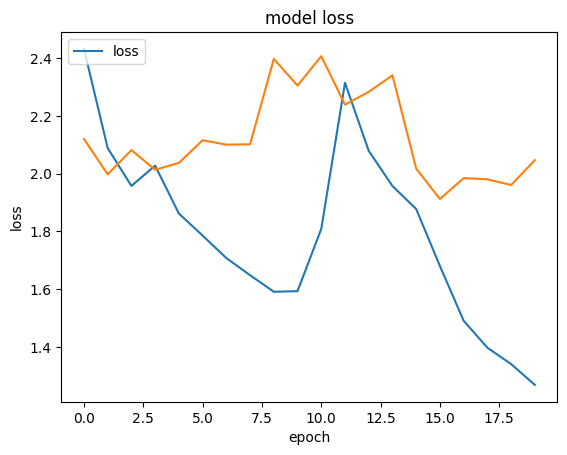

In [ ]:
# Plot the training/validation accuracy and loss
print(model2.history.history.keys())


plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
#plt.plot(mymodel.history.history['loss'])
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()


## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [ ]:
# Re-initialize the model
model2 = create_model2()

In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
model2.load_weights('/content/drive/My Drive/Colab Notebooks/reuters/')

In [ ]:
# Evaluate the trained DL model on the Reuters test dataset
model2.evaluate(x_test2,y_test2, batch_size=1)

2246/2246 [==============================] - 87s 38ms/step - loss: 2.0465 - accuracy: 0.4884


[2.0464794635772705, 0.4884238541126251]

# Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip) 
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (15 points) CNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation
*   Natural Language Processing - RNN
    *   (15 points) Load/Prepare Data
    *   (15 points) RNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation 

